In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os
import torchvision as tv
import pandas as pd 
import matplotlib.patches as patches
import cv2
import torch.utils.data as td

# Load the data 

In [2]:
dataset_root_dir = "/Users/jessicaechterhoff/Documents/UCSD/ECE285MLIP/Project/rgb-ir/helen"

In [3]:
class ImageFolderWithImageNames(tv.datasets.ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithImageNames, self).__getitem__(index)
        image = np.asarray(original_tuple[0].convert('RGB'))
        name = self.imgs[index][0].split('/')[-1].split('.')[0]
        return image, name

dataset = ImageFolderWithImageNames(dataset_root_dir)
data_loader = td.DataLoader(dataset)

# Load the annotations

#### Get the annotations for the respective face (landmark points) and define the bounding box

In [4]:
annotation_root_dir = "/Users/jessicaechterhoff/Documents/UCSD/ECE285MLIP/Project/rgb-ir/annotation_helen"

In [127]:
landmarks_for_images = []
directory = os.path.join("c:\\",annotation_root_dir)
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            imageName = pd.read_csv(annotation_root_dir + "/" + file).columns.values[0]
            annotationDataFrame = np.asarray(pd.read_csv(annotation_root_dir + "/" + file, skiprows=1))
            row = []
            r = []
            r.append(imageName)
            
            annotationDataFrame_labeled = pd.DataFrame(annotationDataFrame, columns = ['x', 'y'])
            r.append(annotationDataFrame_labeled)
            
            landmarks_for_images.append(r)


In [130]:
landmarks_for_images = np.asarray(landmarks_for_images)
print(landmarks_for_images.shape)
landmarks_df = pd.DataFrame(landmarks_for_images, columns = ['imageName', 'landmarks'])

(2330, 2)


In [110]:
faces = []
imageNames = []
landmarks = []
for batch, label in data_loader:
    boundingBoxIndexForImageName = landmarks_df.index[landmarks_df['imageName'] == label[0]].tolist()
    imageNames.append(np.asarray(landmarks_df.iloc[boundingBoxIndexForImageName]['imageName'])[0])
    landmarks.append(np.asarray(landmarks_df.iloc[boundingBoxIndexForImageName]['landmarks'])[0])
    #crop image to same height and width for easier processing
    size = np.minimum(batch.numpy().shape[1], batch.numpy().shape[2])
    face = batch.numpy()[0:1, 0:size, 0:size, 0:3].reshape(size, size, 3)
    faces.append(face)
print(len(faces))

2330


## Check if the bounding boxes of the image are accurate

In [136]:
bbsLeft = []
bbsRight = []
print(len(faces))
for i in range(len(faces)):
    ldmrks = landmarks[i]
    xs = np.asarray(ldmrks['x'])
    ys = np.asarray(ldmrks['y'])
    
    xLeftMin = xs[144]-20
    xLeftMax = xs[133]+20
    yLeftMin = ys[138]-20
    yLeftMax = ys[148]+20

    widthLeft = xLeftMax - xLeftMin
    heightLeft = yLeftMax - yLeftMin

    xRightMin = xs[113]-20
    xRightMax = xs[124]+20
    yRightMin = ys[119]-20
    yRightMax = ys[128]+20


    widthRight = xRightMax - xRightMin
    heightRight = yRightMax - yRightMin
    bb1 = [xLeftMin,yLeftMin,widthLeft,heightLeft]
    bb2 = [xRightMin,yRightMin,widthRight,heightRight]
    bbsLeft.append(bb1)
    bbsRight.append(bb2)
imageNamesAndBBs = pd.DataFrame({"imageNames":imageNames, "left": bbsLeft, "right": bbsRight})
print(imageNamesAndBBs)
imageNamesAndBBs.to_csv('imageNamesAndBBs.csv')

2330
        imageNames                                               left  \
0      100032540_1         [609.97, 596.37, 139.5, 83.73000000000002]   
1      100040721_1         [279.77, 239.82999999999998, 77.93, 52.75]   
2      100040721_2          [270.14, 228.75, 70.44999999999999, 47.5]   
3     1002681492_1         [376.61, 221.85, 98.12, 69.98999999999998]   
4     1004467229_1          [219.95, 92.69, 70.19999999999999, 54.25]   
...            ...                                                ...   
2325  3260548295_1        [792.28, 671.76, 124.55000000000007, 74.25]   
2326  3260548295_2  [373.27, 378.3, 85.16000000000003, 60.99000000...   
2327  3261640996_1        [654.64, 639.28, 119.25, 68.26999999999998]   
2328  3262777136_1  [180.88, 248.58999999999997, 87.50999999999999...   
2329  3266693323_1          [901.51, 796.0, 151.0, 80.73000000000002]   

                                                  right  
0            [853.7, 610.26, 152.28999999999996, 80.75]  
1 

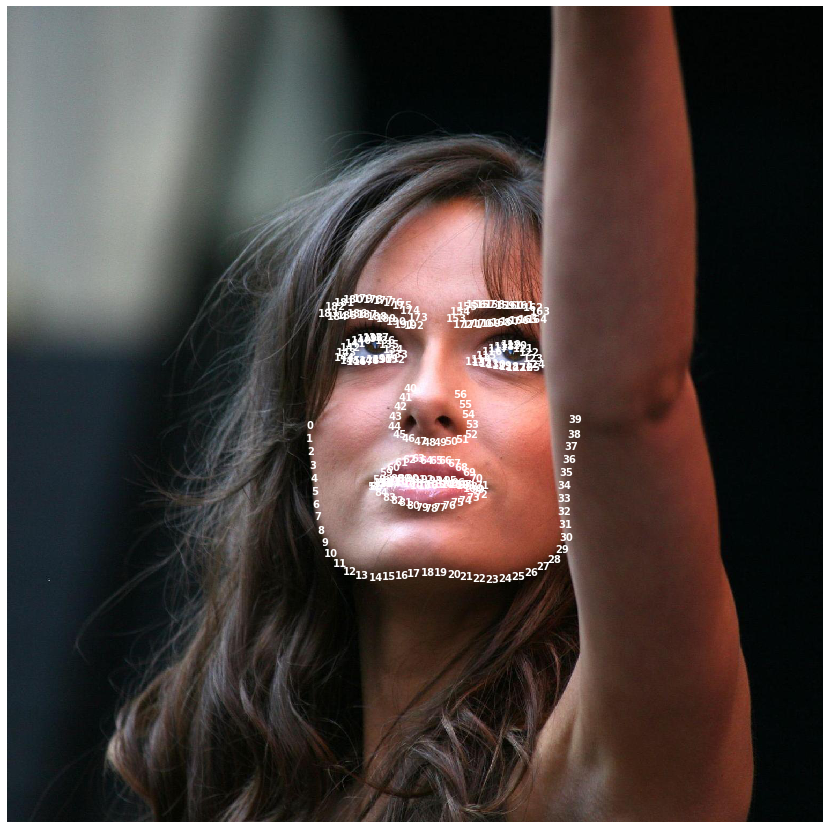

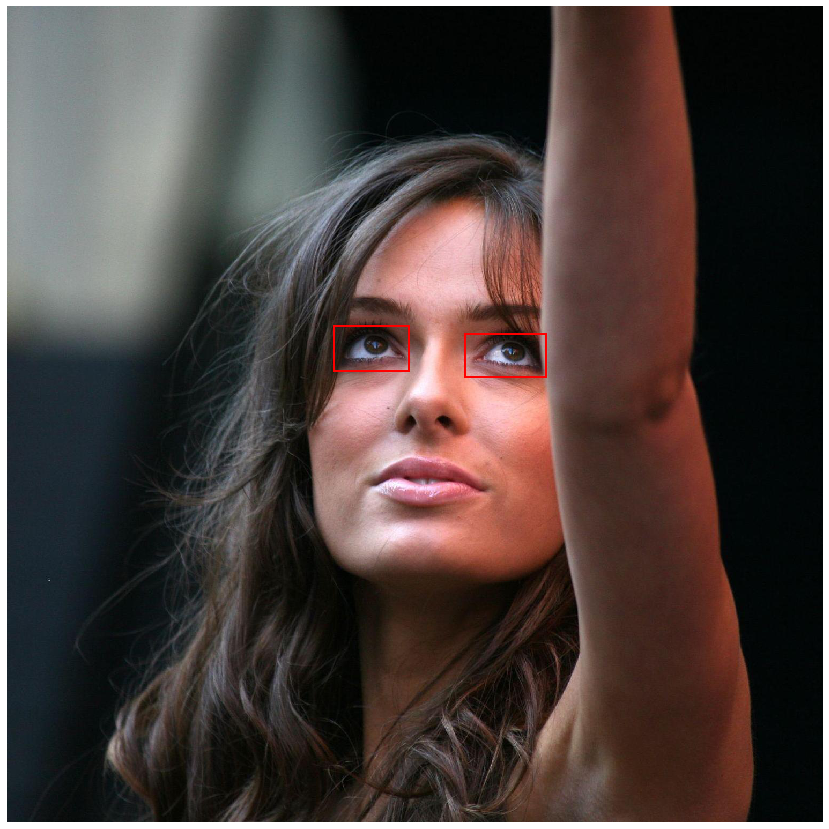

In [149]:

facenb = 0


im = faces[facenb]
ldmrks = landmarks[facenb]
xs = np.asarray(ldmrks['x'])
xs = xs
ys = np.asarray(ldmrks['y'])
ys = ys

fig,ax = plt.subplots(1, figsize=(15,15))
for i in range(len(xs)):
    x = xs[i]
    y = ys[i]
    circle = patches.Circle((x, y), radius=5)
    #ax.add_patch(circle)
    ax.annotate(i, (x, y), color='w', weight='bold', 
                fontsize=10, ha='center', va='center')
ax.imshow(im)
ax.axis('off')
plt.savefig('helen_landmarks_eyes.png')

ldmrk = np.asarray(landmarks[0])
bb = np.asarray(bbs[facenb])[1]
xmin = float(bb[0])
ymin = float(bb[1])
width = float(bb[2])
height = float(bb[3])
xLeftMin = xs[144]-20
xLeftMax = xs[133]+20
yLeftMin = ys[138]-20
yLeftMax = ys[148]+20

widthLeft = xLeftMax - xLeftMin
heightLeft = yLeftMax - yLeftMin
rectRight = patches.Rectangle((xmin,ymin),width,height,linewidth=2,edgecolor='r',facecolor='none')

bb = np.asarray(bbs[facenb])[0]
xmin = float(bb[0])
ymin = float(bb[1])
width = float(bb[2])
height = float(bb[3])
xRightMin = xs[113]-20
xRightMax = xs[124]+20
yRightMin = ys[119]-20
yRightMax = ys[128]+20


widthRight = xRightMax - xRightMin
heightRight = yRightMax - yRightMin

fig,ax = plt.subplots(1, figsize=(15,15))

ax.imshow(im)
ax.axis('off')

# Create a Rectangle patch
rectLeft = patches.Rectangle((xmin,ymin),width,height,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rectRight)
ax.add_patch(rectLeft)
plt.savefig('helen_landmarks_BBs.png')       
plt.show()



## Create the object detector for reference


In [33]:
class EyeDetector(object):
    def __init__(self, xml_path):
        self.classifier = cv2.CascadeClassifier(xml_path)
    
    def detectEye(self, im, biggest_only=True):
        biggest_only = True
        eyes_coord = self.classifier.detectMultiScale(im, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
        return eyes_coord

def crop_eyes(im, eyes_coord):
    eyes = []
    for (x, y, width, height) in eyes_coord:
        width_zoom = int(0.3 * width / 2)
        eyes.append(im[y: y + height, x + width_zoom: x + width - width_zoom])
    return eyes

def resize(ims, size=(1000, 1000)):
    ims_norm = []
    count = 0;
    for im in ims:
        if im.shape < size:
            im_norm = cv2.resize(im, size, interpolation=cv2.INTER_AREA).reshape(size[0], size[1], 3)
        else:
            im_norm = cv2.resize(im, size, interpolation=cv2.INTER_CUBIC).reshape(size[0], size[1], 3)
        ims_norm.append(im_norm)
        
    return ims_norm

def normalize_eyes(im, eyes_coord):
    eyes = crop_eyes(im, eyes_coord)
    eyes = resize(eyes)
    return eyes

detectorEye = EyeDetector("/Users/jessicaechterhoff/Documents/UCSD/ECE285MLIP/Project/rgb-ir/haarcascade_eye.xml")
#Test the eye detector
eyes_coord = detectorEye.detectEye(im, True)   

## Check the detection

(-0.5, 1521.5, 1521.5, -0.5)

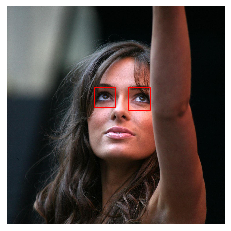

In [34]:
fig,ax = plt.subplots(1)
for coordinate in eyes_coord:
    x = coordinate[0]
    y = coordinate[1]
    width = coordinate[2]
    height = coordinate[3]
    rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
ax.imshow(im)
ax.axis('off')

## Crop and save the eyes 

In [50]:
eyes = []
eyes_coords = []
path = "/Users/jessicaechterhoff/Documents/UCSD/ECE285MLIP/Project/rgb-ir/ExtractedEyeImages"
faceNumber = 0
for face in faces:
    eyes_coord = detectorEye.detectEye(face, True)
    eyes_coords.append(eyes_coord)
    for coords in eyes_coord:
        eyes_for_face = normalize_eyes(face ,eyes_coord) 
        eyes.append(eyes_for_face)
        i = 0
        for eye in eyes_for_face:
            name = 'face_number_' + str(faceNumber) + '_coordinates='  + str(eyes_coord).replace(" ", "_").replace("\n", ",") + '_isLeft=' + str(i) + '.jpg'
            cv2.imwrite(os.path.join(path , name), cv2.cvtColor(eyes_for_face[i], cv2.COLOR_RGB2BGR))
            i+=1
    faceNumber += 1

(-0.5, 999.5, 999.5, -0.5)

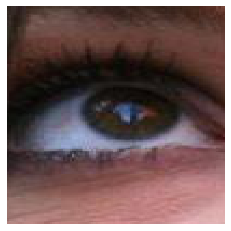

In [46]:
fig,ax = plt.subplots(1)
ax.imshow(eyes[0][0])
ax.axis('off')

In [47]:
print(len(eyes_coords[0]))

2


# Evaluate the performance of the object detector

In [ ]:
#Instead of using intersection over union, we check if all the landmarks are inside the bounding box
#check if eyes_coords surround x percent of the landmark coordinates 
# landmarks are a dataframe and we need the rows 113-152 of it 
def evaluatePerformance(bounding_boxes, landmark_coordinates, threshold=0.7):
    numberOfCorrectlyDetected = 0
    allPoints = 0
    for idx in range(len(bounding_boxes)):
        bounding_box = bounding_boxes[idx]
        for box in bounding_box:
            x = box[0]
            y = box[1]
            width = box[2]
            height = box[3]
            topLeft = (x,y)
            topRight = (x+width,y)
            bottomLeft = (x,y+height)
            bottomRight = (x+width,y+height)
            landmark = landmark_coordinates[idx]
            xsLeft = landmark['x'][113:132]#we only need the eyes
            ysLeft = landmark['y'][113:132]
            xsRight = landmark['x'][133:153]#we only need the eyes
            ysRight = landmark['y'][133:153]
            numberOfpointsCorrectlyDetected = 0
            inLeft = False
            for i in range(113,132):#check for the left eye
                x = xsLeft[i]
                y = ysLeft[i]
                if (x > topLeft[0] and x < bottomRight[0] and y > topLeft[1] and y < bottomRight[1]):
                    numberOfpointsCorrectlyDetected+=1
                    inLeft = True
            if not inLeft:#check for the right eye 
                for i in range(133,153):
                    x = xsRight[i]
                    y = ysRight[i]
                    if (x > topLeft[0] and x < bottomRight[0] and y > topLeft[1] and y < bottomRight[1]):
                        numberOfpointsCorrectlyDetected+=1
            if(numberOfpointsCorrectlyDetected/20 >= threshold):
                numberOfCorrectlyDetected+=1
            allPoints += 1
            
    return numberOfCorrectlyDetected/allPoints
    

In [42]:
#percentage of correctly detected eyes
print(evaluatePerformance(eyes_coords, landmarks))

0.4987603908414759
